In [1]:
# load the libraries
library(OpenStreetMap)
library(ggplot2)
library(sp)
library (rgdal)


code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for me

In [2]:
# South pole coordinates (south of tropic of Capricorn)
LAT1 =  -23 ; LAT2 = -85
LON1 = -180 ; LON2 = 180


In [11]:
map <- openmap(c(LAT2,LON1), c(LAT1,LON2),
               zoom = 2,
               type = "esri-topo",
               mergeTiles = TRUE)
print("done loading map")

[1] "done loading map"


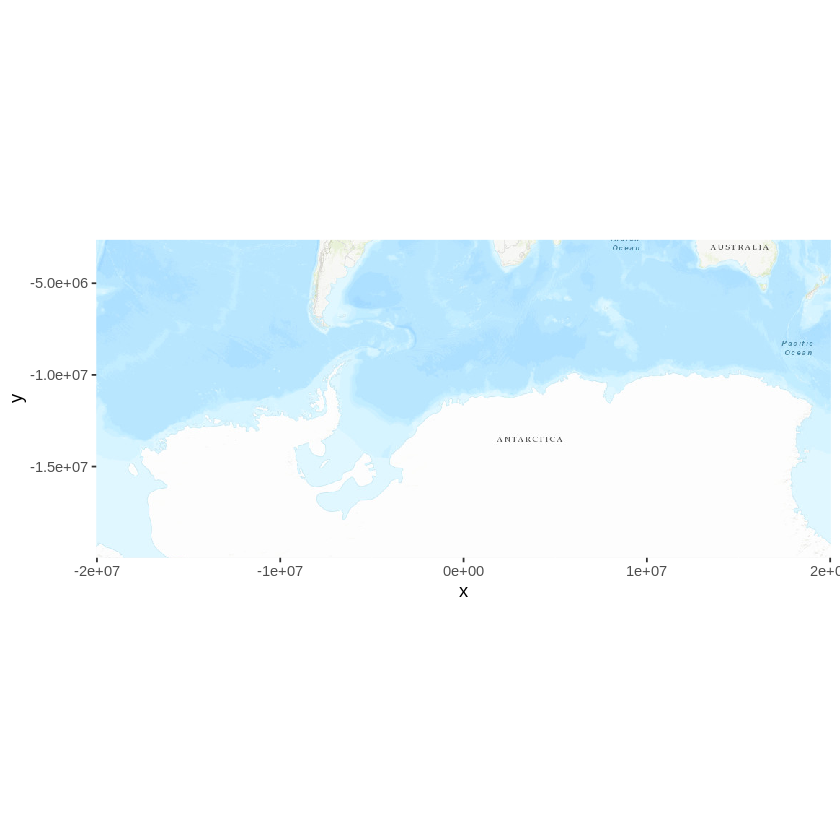

In [12]:
autoplot(map)

In [4]:
proj = "+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"
# reproject map
map.proj <- openproj(map, projection = proj)
print("done projecting map")

[1] "done projecting map"


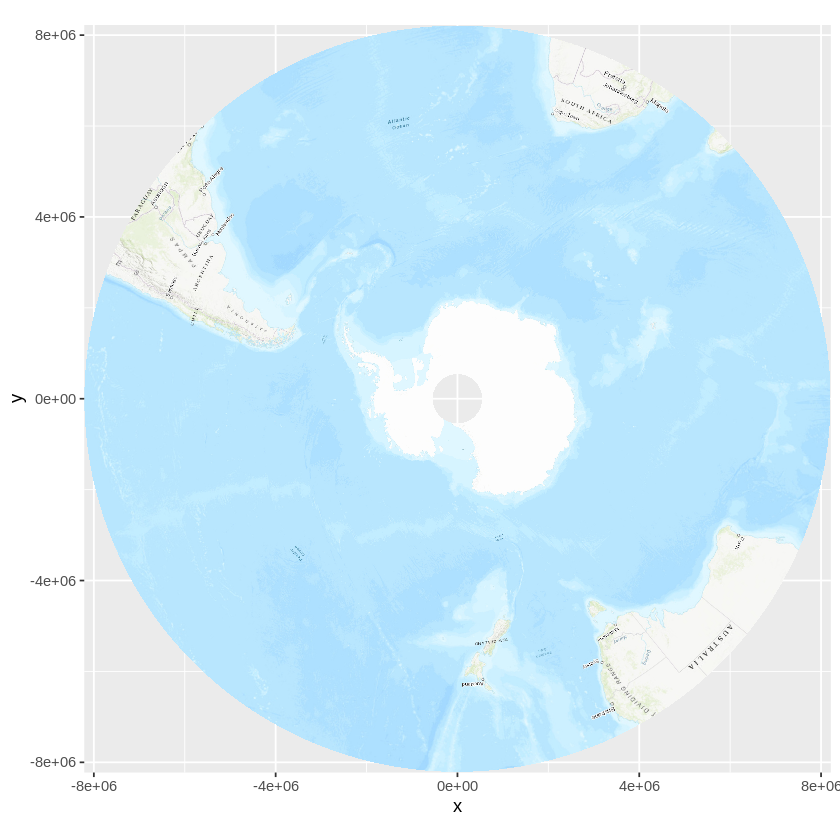

In [5]:
autoplot(map.proj)

In [6]:
library(readr)
occurrences <- read_tsv("data//GBIF_Spheniscidae.zip")
print("done reading data")

Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  infraspecificEpithet = col_logical(),
  individualCount = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_double(),
  elevationAccuracy = col_double(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  dateIdentified = col_logical(),
  typeStatus = col_logical(),
  establishmentMeans = col_logical()
  # ... with 2 more columns
)

See spec(...) for full column specifications.

Warning message:
“303318 parsing failures.
 row                  col           expected                                      actual                          file
4317 mediaType            1/0/T/F/TRUE/FALSE S

[1] "done reading data"


In [24]:
sampled <- occurrences[sample(nrow(occurrences), 1000),]
sampled <- sampled[sampled$decimalLatitude < LAT1, ]
coordinates(sampled) <- c("decimalLongitude", "decimalLatitude")
print("done sampling data")

[1] "done sampling data"


In [25]:
# project
proj4string(sampled) <- CRS("+proj=longlat +ellps=clrk66")
# summary(strix_df)
sampled.proj <- spTransform(sampled, CRS=CRS(proj))
print("done projecting data")

[1] "done projecting data"


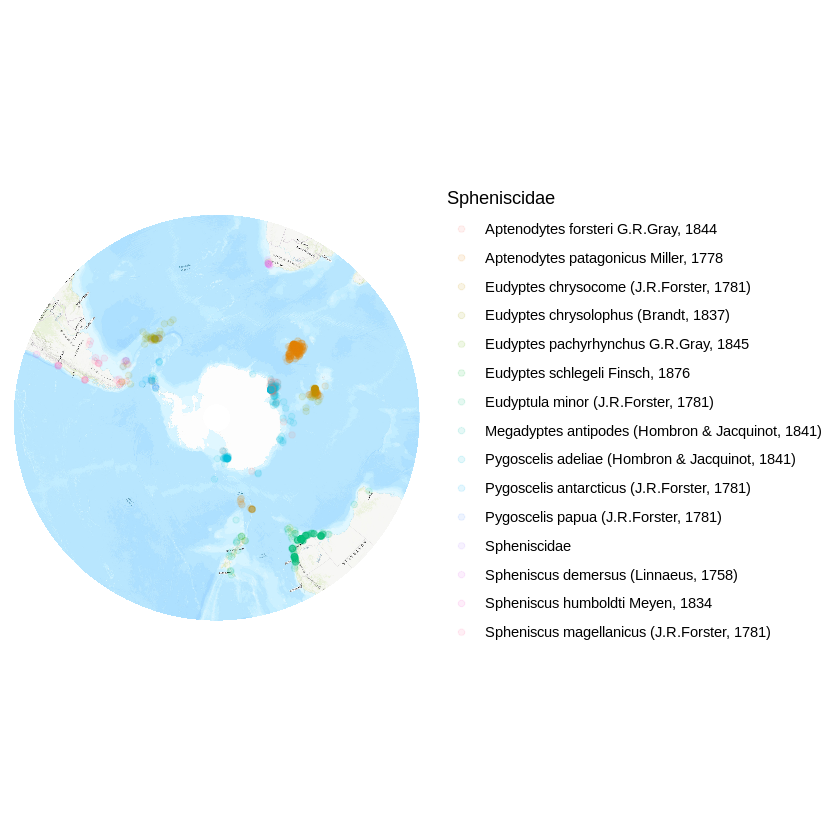

In [26]:
autoplot(map.proj) + 
    geom_point(
        data = data.frame(sampled.proj), 
        aes(x = decimalLongitude, y = decimalLatitude, color=scientificName),
        alpha=0.1
    ) + 
    theme_classic() +
    theme(
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line = element_blank()
    ) + 
    scale_color_discrete(name = "Spheniscidae")
